In [92]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
train = pd.read_csv('train_pred.csv')

In [4]:
test = pd.read_csv('test_pred.csv')

In [5]:
train.shape #Overview

(201917, 1743)

In [6]:
train = train.iloc[:,1:] #Remove 1st column

In [7]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,authorized_flag&1&purchase_amount,authorized_flag&1&installments,city_id&19&purchase_amount,city_id&19&installments,...,category_4_var,category_4_skew,category_4_sum,city_id_nunique,merchant_category_id_nunique,merchant_id_nunique,state_id_nunique,subsector_id_nunique,card_id_size,card_id_count
0,67,C_ID_92a2005557,5,2,1,-0.820283,-170.641218,0.0,-1.422815,0.0,...,0.054623,-3.811953,261.0,9,46,118,3,21,283,283
1,62,C_ID_3d0044924f,4,1,0,0.392913,-213.239185,507.0,-4.782308,7.0,...,0.075036,-3.073118,327.0,9,58,148,3,24,356,356
2,57,C_ID_d639edf6cd,2,2,0,0.688056,-28.528749,0.0,-0.705405,0.0,...,0.065011,-3.548480,41.0,5,9,14,2,8,44,44
3,70,C_ID_186d6a6901,4,3,0,0.142495,-54.145736,89.0,-0.707839,1.0,...,0.023523,-6.361110,82.0,7,28,57,5,15,84,84
4,72,C_ID_cdbd2c0db2,1,3,0,-0.159749,-88.966702,179.0,0.000000,0.0,...,0.091496,-2.668681,151.0,7,37,103,7,19,169,169


In [9]:
1 - np.count_nonzero(train)/train.size #zero%

0.7739293811412331

In [10]:
train_features = train.columns.tolist()


In [11]:
train_features.remove('card_id')

In [12]:
train_features.remove('target')

In [13]:
feature_filter = train_features[:]

In [15]:
corr = []
for fea in feature_filter:
    corr.append(train[[fea, 'target']].fillna(0).corr().values[0,1])
#Pearson correlation matrix

In [16]:
se = pd.Series(corr, index = feature_filter).sort_values(ascending = False)

In [48]:
feature_filter = ['card_id'] + se[:300].index.tolist() #SELECT TOP300

In [49]:
train_RF = train[feature_filter + ['target']]

In [50]:
test_RF = test[feature_filter]

In [20]:
import matplotlib.pyplot as plt

(array([ 21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          3.,   2.,   2.,   2.,   2.,   9.,   2.,  10.,   9.,  10.,   9.,
         10.,   7.,   3.,   6.,   8.,  17.,  10.,   5.,  19.,  13.,  27.,
         29.,  27.,  25.,  43.,  50., 108., 242., 662., 212.,  37.,  16.,
         11.,   8.,   7.,   8.,  10.,   2.,   1.,   6.,   3.,   2.,   2.,
          1.,   0.,   2.,   2.,   0.,   0.,   2.,   2.,   1.,   1.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   3.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          1.]),
 array([-0.1       , -0.09805683, -0.09611366, -0.09417049, -0.09222732,
        -0.09028415, -0.08834098, -0.08639781, -0.08445464, -0.08251147,
        -0.0805683 , -0.07862513, -0.07668196, -0.07473879, -0.07279562,
        -0.07085245, -0.06890928, -0.0669661 , -0.06502293, -0.06307976,
        -0.06113659, -0.05

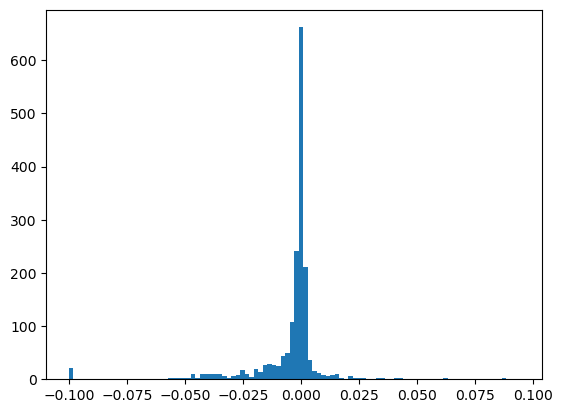

In [21]:
#correlation distribution visualization
plt.Figure()
plt.hist(se.fillna(-0.1).values, bins = 100)

In [22]:
#na%
null_perc = []
for fea in train_features:
    fea_null_perc = 1 - np.count_nonzero(train[fea])/train.shape[0]
    null_perc.append(fea_null_perc)
    
train_null_perc = pd.Series(null_perc, index = train_features).sort_values(ascending = False)


(array([128.,  49.,  20.,   8.,  10.,  11.,   4.,   1.,   4.,   4.,   8.,
          1.,   1.,   1.,   1.,   5.,   3.,   1.,   5.,   7.,   3.,   2.,
          3.,   6.,   4.,   3.,   5.,   7.,   4.,   2.,   4.,   4.,   5.,
          4.,   2.,   2.,   1.,   4.,   3.,   0.,   1.,   2.,   5.,   5.,
          1.,   2.,   2.,   7.,   9.,   1.,   3.,   2.,   8.,   3.,   2.,
          2.,   5.,   4.,   5.,   2.,   4.,   6.,   3.,   1.,   2.,   2.,
          3.,   3.,   3.,   1.,  11.,   0.,   7.,   2.,   4.,   2.,   4.,
          3.,   4.,   7.,   5.,   3.,   5.,   4.,   6.,  10.,  10.,   3.,
         11.,  10.,  11.,  13.,  16.,  19.,  21.,  29.,  36.,  62., 153.,
        830.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

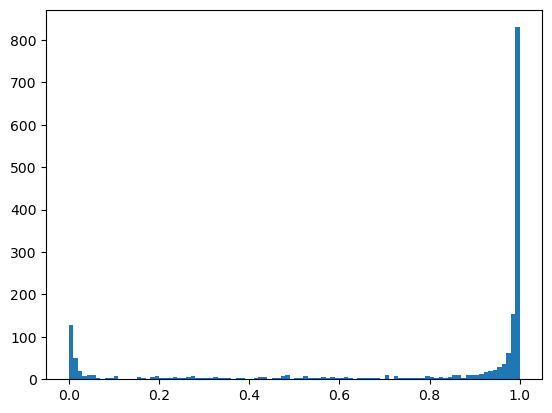

In [23]:
#na% distribution visualization
plt.Figure()
plt.hist(train_null_perc.values, bins = 100)

In [24]:
def feature_select_pearson(train, test):
    #Pearson correlation feature selection tool
    print('feature_select...')
    features = train.columns.tolist()
    features.remove("card_id")
    features.remove("target")
    featureSelect = features[:]
    # remove na%>99%
    for fea in features:
        if train[fea].isnull().sum() / train.shape[0] >= 0.99:
            featureSelect.remove(fea)
    # Pearson Correlation list
    corr = []
    for fea in featureSelect:
        corr.append(abs(train[[fea, 'target']].fillna(0).corr().values[0][1]))
    # Selecti
    se = pd.Series(corr, index=featureSelect).sort_values(ascending=False)
    feature_select = ['card_id'] + se[:300].index.tolist()
    print('done')
    return train[feature_select + ['target']], test[feature_select]


In [25]:
feature_select_pearson(train, test)

feature_select...
done


(                card_id  purchase_month_max_hist  purchase_month_mean_hist  \
 0       C_ID_92a2005557                       12                  8.708861   
 1       C_ID_3d0044924f                       11                  6.110368   
 2       C_ID_d639edf6cd                       12                  4.190476   
 3       C_ID_186d6a6901                       12                  9.426230   
 4       C_ID_cdbd2c0db2                       12                 11.255102   
 ...                 ...                      ...                       ...   
 201912  C_ID_963962de2c                       12                 10.361111   
 201913  C_ID_1314773c0b                       12                  8.560976   
 201914  C_ID_7666735b3d                       12                  9.176471   
 201915  C_ID_73f5a0efd0                        8                  4.650000   
 201916  C_ID_92c9984c58                       12                  7.879699   
 
         purchase_month_max  purchase_month_mean  

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [38]:
def param_grid_search(train):

    # Grid search tool-hyper parameter tuning
    print('param_grid_search')
    features = train.columns.tolist()
    features.remove("card_id")
    features.remove("target")
    parameter_space = {
        "n_estimators": [81], 
        "min_samples_leaf": [31],
        "min_samples_split": [2],
        "max_depth": [10],
        "max_features": [80]
    }
    

    print("Tuning hyper-parameters for mse")

    clf = RandomForestRegressor(
        criterion="squared_error",
        n_jobs=15,
        random_state=22)

    grid = GridSearchCV(clf, parameter_space, cv=2, scoring="neg_mean_squared_error")
    grid.fit(train[features].values, train['target'].values)
    

    print("best_params_:")
    print(grid.best_params_)
    means = grid.cv_results_["mean_test_score"]
    stds = grid.cv_results_["std_test_score"]

    for mean, std, params in zip(means, stds, grid.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    return grid

In [39]:
grid = param_grid_search(train_RF)

param_grid_search
Tuning hyper-parameters for mse
best_params_:
{'max_depth': 10, 'max_features': 80, 'min_samples_leaf': 31, 'min_samples_split': 2, 'n_estimators': 81}
-13.729 (+/-0.090) for {'max_depth': 10, 'max_features': 80, 'min_samples_leaf': 31, 'min_samples_split': 2, 'n_estimators': 81}


In [40]:
grid.best_estimator_

RandomForestRegressor(max_depth=10, max_features=80, min_samples_leaf=31,
                      n_estimators=81, n_jobs=15, random_state=22)

In [41]:
grid.best_score_

-13.728861717662618

In [42]:
np.sqrt(-grid.best_score_)

3.7052478618390183

In [44]:
test_RF['target'] = grid.best_estimator_.predict(test_RF[se[:300].index.tolist()])

/Users/keweilu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [51]:
'card_id' in test_RF.columns.tolist()

True

In [57]:
from sklearn.model_selection import KFold
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error

In [90]:
def train_predict(train, test, best_clf):
    #Cross validation
    features = train.columns.tolist()
    features.remove('card_id')
    features. remove('target')
    
    prediction_test = 0
    cv_score = []
    prediction_train = pd.Series()
    
    kf = KFold(n_splits=5, shuffle=True, random_state=99)
    for trainpart_index, eval_index in kf.split(train[features], train['target']):
        best_clf.fit(train[features].loc[trainpart_index, :].values, train['target'].loc[trainpart_index].values)
        prediction_test += best_clf.predict(test[features].values)
        eval_pre = best_clf.predict(train[features].loc[eval_index].values)
        score = np.sqrt(mean_squared_error(train['target'].loc[eval_index].values, eval_pre))
        cv_score.append(score)
        print(score)
        prediction_train = prediction_train.append(pd.Series(eval_pre, index = eval_index))
    print('Cross Validation Score:', cv_score, sum(cv_score)/5)
    pd.Series(prediction_train.sort_index().values).to_csv('train_rfcv.csv', index = False)
    pd.Series(prediction_test/5).to_csv('test_rfcv.csv', index = False)
    test['target'] = prediction_test / 5
    test[['card_id', 'target']].to_csv('submission_rfcv.csv', index = False)
    return

In [91]:
train_predict(train_RF, test_RF, grid.best_estimator_)

/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/1817314060.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  prediction_train = pd.Series()


3.7731514580135204


/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/1817314060.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_train = prediction_train.append(pd.Series(eval_pre, index = eval_index))


3.7035716935676892


/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/1817314060.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_train = prediction_train.append(pd.Series(eval_pre, index = eval_index))


3.6928186230659175


/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/1817314060.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_train = prediction_train.append(pd.Series(eval_pre, index = eval_index))


3.6526261960954924


/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/1817314060.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_train = prediction_train.append(pd.Series(eval_pre, index = eval_index))


3.6790649221121416
Cross Validation Score: [3.7731514580135204, 3.7035716935676892, 3.6928186230659175, 3.6526261960954924, 3.6790649221121416] 3.700246578570952


/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/1817314060.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_train = prediction_train.append(pd.Series(eval_pre, index = eval_index))
/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/1817314060.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['target'] = prediction_test / 5


In [103]:
def train_predict(train, test, best_clf):
    features = train.columns.tolist()
    features.remove('card_id')
    features. remove('target')
    
    prediction_test = 0
    cv_score = []
    prediction_train = pd.Series()
    
    kf = KFold(n_splits=5, shuffle=True, random_state=80)
    for n,(trainpart_index, eval_index) in enumerate(kf.split(train[features], train['target'])):
        
        best_clf.fit(train[features].loc[trainpart_index, :].values, train['target'].loc[trainpart_index].values)
        
        n_pred = best_clf.predict(test[features].values)
        prediction_test += n_pred
        prediction = pd.DataFrame()
        prediction['card_id'] = test['card_id']
        prediction['target'] = n_pred
        prediction.to_csv(f'submission_rfcv{n+1}.csv', index = False)
        
        eval_pre = best_clf.predict(train[features].loc[eval_index].values)
        score = np.sqrt(mean_squared_error(train['target'].loc[eval_index].values, eval_pre))
        cv_score.append(score)
        print(f'{n+1}th CV Score:',score)
        
        prediction_train = prediction_train.append(pd.Series(eval_pre, index = eval_index))
    print('Avg Cross Validation Score:', sum(cv_score)/5)
    pd.Series(prediction_train.sort_index().values).to_csv('train_rfcv.csv', index = False)
    pd.Series(prediction_test/5).to_csv('test_rfcv.csv', index = False)
    test['target'] = prediction_test / 5
    test[['card_id', 'target']].to_csv('submission_rfcv.csv', index = False)
    return

In [104]:
train_predict(train_RF, test_RF, grid.best_estimator_)

/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/2819986856.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  prediction_train = pd.Series()


1th CV Score: 3.7998406726112357


/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/2819986856.py:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_train = prediction_train.append(pd.Series(eval_pre, index = eval_index))


2th CV Score: 3.685710340030291


/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/2819986856.py:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_train = prediction_train.append(pd.Series(eval_pre, index = eval_index))


3th CV Score: 3.6978358698995


/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/2819986856.py:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_train = prediction_train.append(pd.Series(eval_pre, index = eval_index))


4th CV Score: 3.7068824764808483


/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/2819986856.py:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_train = prediction_train.append(pd.Series(eval_pre, index = eval_index))


5th CV Score: 3.607230665601487
Avg Cross Validation Score: 3.699500004924672


/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/2819986856.py:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction_train = prediction_train.append(pd.Series(eval_pre, index = eval_index))
/var/folders/3v/m7ykfptx4bn621t68jmzkl580000gn/T/ipykernel_41092/2819986856.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['target'] = prediction_test / 5
